# 02.02 Randomness in `NumPy`

The random module seem confusing at first due to the number of functions it provides.
In reality you will be only using a handful of these functions.

We will get ahead of ourselves and use some plotting code.
Please ignore it for now, we will see it shortly.
For now we will use the plots to describe how the random numbers
are generated.

Let's look at what kind of random numbers these functions generate.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

![Dice](np-dice.svg)

<div style="text-align:right;"><sup>np-dice.svg</sup></div>

For a start we can use the `np.random` functions,
these are good enough to generate some random numbers.
The most common uses of randomness are here:

- `rand` generates floating point values between $0$ and $1$.
  taking them from a uniform distribution.

- `normal` takes random numbers from a normal distribution.
  Deep below the hood it uses `rand` and then a quantile function.

- `randint` is given two integers and it generates random
  integers between these values.  Below the hood it uses `rand`.

- `choice` select values from the array given as the first argument at random.
  By default it does so with replacement but one can set `replace=False`
  in order to achieve choice without replacement.
  Below the hood it uses `randint`.

So, well, in the end the random module has just a single function that
generates (pseudo-)random numbers.
All other functions use the first random function and use its values
in clever ways to achieve different and useful interfaces.
On most computers even the first function which generates random
values between $0$ and $1$ is just borrowed from the operating system.

Hence yes, all computers do is to generate random floating point
numbers from a uniform distribution between $0$ and $1$.
All other functions in a random library, including `np.random`
are clever interfaces on how to turn those numbers between $0$
and $1$ into more convenient uses and distributions.
And we can see the graphs of these distributions:

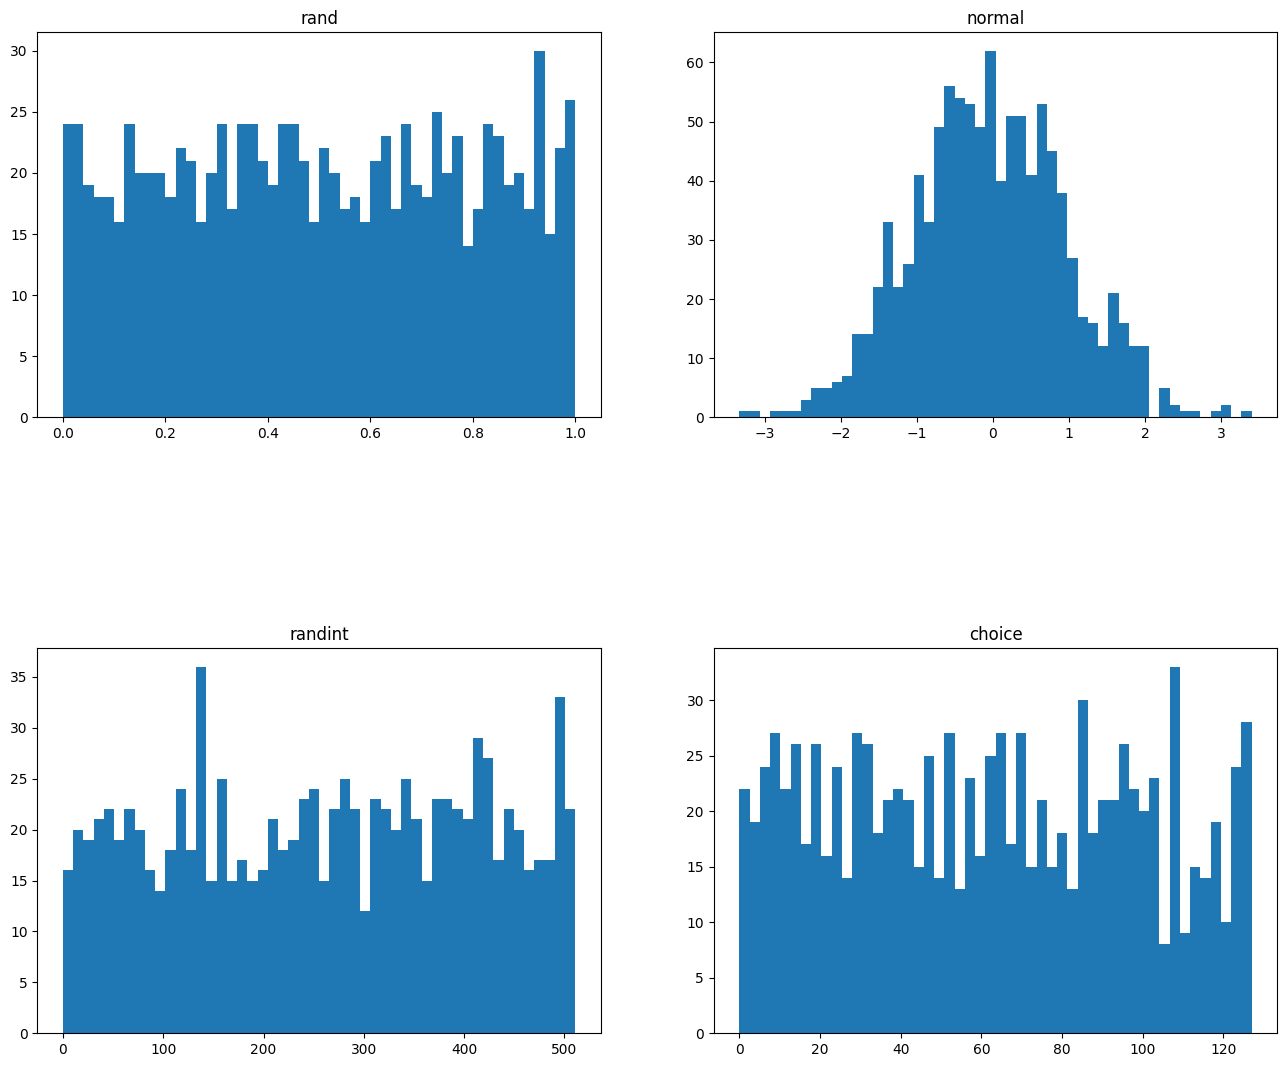

In [2]:
r = {}
rng = np.random.default_rng()
r["rand"] = rng.random(1024)
r["normal"] = rng.normal(size=1024)
r["randint"] = rng.integers(0, 512, 1024)
r["choice"] = rng.choice(np.arange(128), 1024)

fig, ax = plt.subplots(2, 2, figsize=(16, 13))
fig.subplots_adjust(hspace=0.6)
order = ["rand", "normal", "randint", "choice"]
for idx, dist in enumerate(order):
    ax[idx // 2, idx % 2].hist(r[dist], bins=50)
    ax[idx // 2, idx % 2].title.set_text(dist)

Note that as with array creation you can give a tuple
as the shape of the resulting array returned by randomness
generating functions.
Or reshape it yourself afterward.
As we have seen there is no significant difference
since data is not copied.

Random numbers are all fun and good but sometimes we want
number that are reasonably random but are always the same random numbers.
What?  Yes.  We want random numbers that are known to us.
This is useful if we have code that works reasonably well for most
inputs and we want a known run of this code.
Or to make a specific test of the results of such code.

We can seed the random number generator,
this will give us a seeded object that works in a very similar way
to `np.random` but which always outputs the same sequence of random numbers.
If we change the seed he sequence changes but as long as the seed is the
same the code will run in the same way every time.
Here we replicate the above with the seed method:

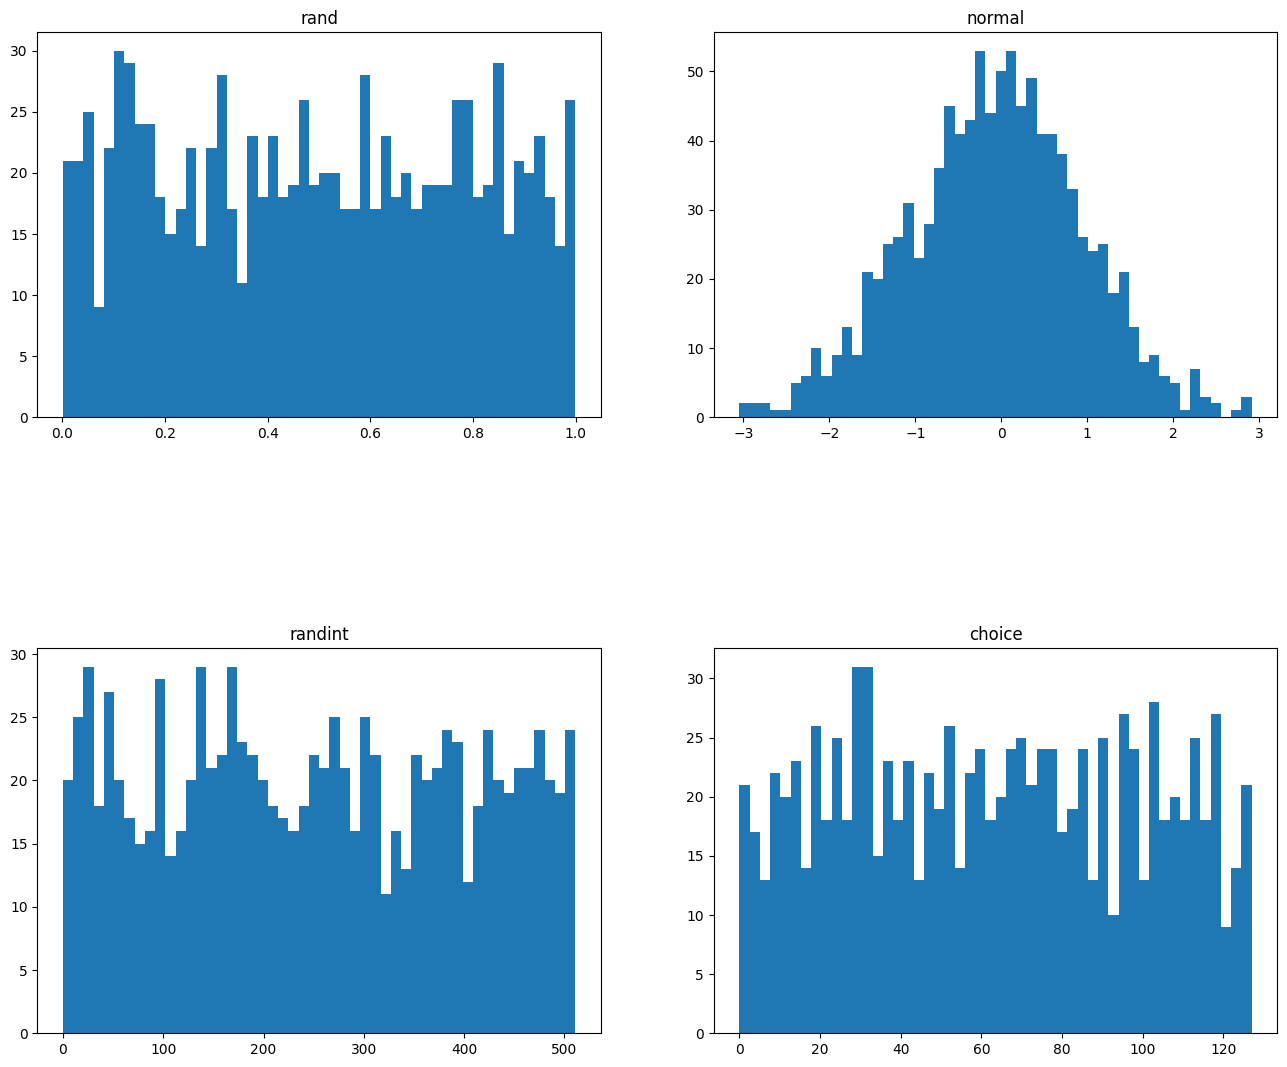

In [3]:
rng = np.random.default_rng(seed=42)
r = {}
r["rand"] = rng.random(1024)
r["normal"] = rng.normal(size=1024)
r["randint"] = rng.integers(0, 512, 1024)
r["choice"] = rng.choice(np.arange(128), 1024)

fig, ax = plt.subplots(2, 2, figsize=(16, 13))
fig.subplots_adjust(hspace=0.6)
order = ["rand", "normal", "randint", "choice"]
for idx, dist in enumerate(order):
    ax[idx // 2, idx % 2].hist(r[dist], bins=50)
    ax[idx // 2, idx % 2].title.set_text(dist)

You may have noticed that we did call the `normal` procedure with
a `size=` argument every time.
This is because that function produces values from a normal distribution
with specific parameters: the mean and standard deviation.
By default the mean is $0$ and the standard deviation is $1$
but since these arguments come before the number of random numbers we
want to retrieve from the distribution we need to explicitly name the argument above.

As you change the parameters of the normal distribution you generate random
numbers with slightly different values.
This is only visible if you generate a reasonably big amount of random numbers.
Let's do exactly that: generate some random numbers from slightly different distributions:

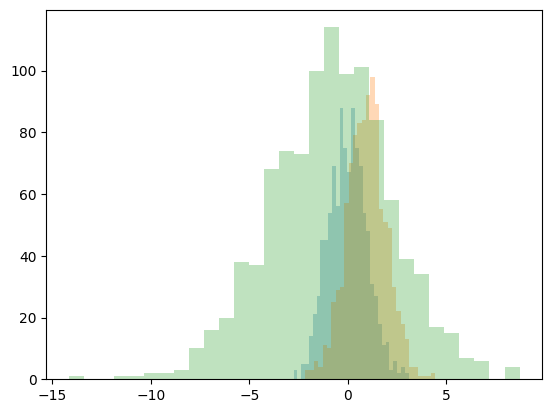

In [4]:
r = {}
r["n1"] = rng.normal(0, 1, size=1024)
r["n2"] = rng.normal(1, 1, size=1024)
r["n3"] = rng.normal(-1, 3, size=1024)
for dist in r.keys():
    plt.hist(r[dist], bins=30, alpha=0.3)

There are many more distributions to select random numbers from:
*binomial*, *pareto* and *weibull* are some common ones.  The full list of
functions can be found in the [numpy documentation][nprnd].
As well as in the in-built documentation.

[nprnd]:  https://numpy.org/doc/stable/reference/random/generator.html#distributions "NumPy random"

In [ ]:
np.random?